In [8]:
# %pip install linearmodels
# Install last version of Pandas:
%pip install --upgrade pandas
# %pip install plotnine
# Run in the virtual environment:
# source envkkr/bin/activate
# %pip install numba

^C
Traceback (most recent call last):
  File "/Users/pedrovallocci/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/pedrovallocci/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src/envkkr/lib/python3.9/site-packages/pip/__main__.py", line 22, in <module>
    from pip._internal.cli.main import main as _main
  File "/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src/envkkr/lib/python3.9/site-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src/envkkr/lib/python3.9/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_mai

In [2]:
from embedding_tools import *
embeddings = Embeddings()
knocap = EmbeddingsHKRModel().from_topic_similarity(embeddings, term = 'knowledge capital', modelname="embeddings_kno_cap")
intcap = EmbeddingsHKRModel().from_topic_similarity(embeddings, term = 'intangible capital', modelname="embeddings_kno_cap")
ip = EmbeddingsHKRModel().from_topic_similarity(embeddings, term = 'intellectual property', modelname="embeddings_kno_cap")
humcap = EmbeddingsHKRModel().from_topic_similarity(embeddings, term = 'human capital', modelname="embeddings_kno_cap")
patents = EmbeddingsHKRModel().from_topic_similarity(embeddings, term = 'patent', modelname="embeddings_kno_cap")


Embeddings loaded from data/embeddings.pkl


In [1]:
# # Example usage
# models = {
#     'knocap': knocap,
#     'intcap': intcap,
#     'ip': ip,
#     'humcap': humcap,
#     'patents': patents
# }
import embedding_tools as et
embeddings = et.Embeddings()
# terms = ['topic_kk']
et.plot_spearman_correlation(embeddings, ["knowledge capital", "intangible capital", "intellectual property", "human capital", "patent"])

NameError: name 'embeddings' is not defined

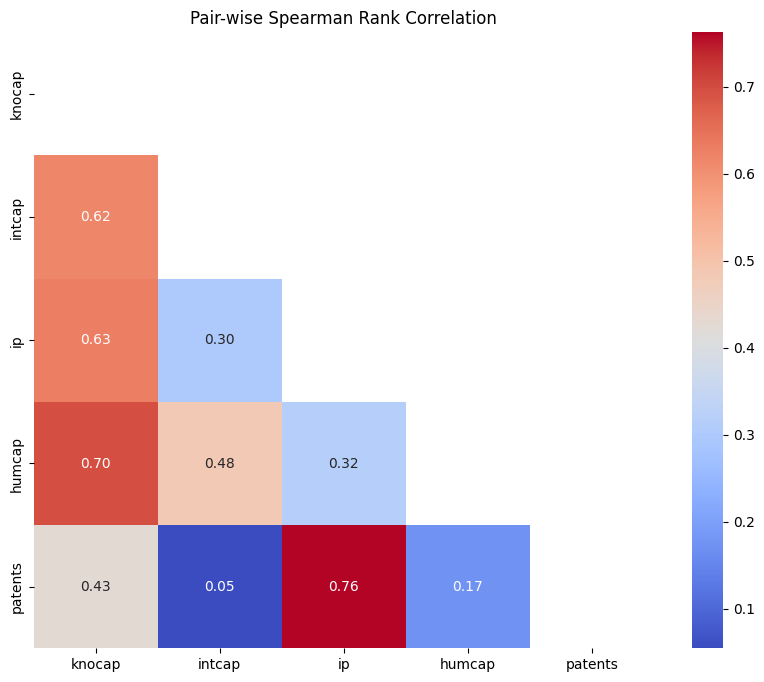

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 

# Get the topic vectors for each model
knocap_topic_kk = knocap.topic_map["topic_kk"].to_numpy()
intcap_topic_kk = intcap.topic_map["topic_kk"].to_numpy()
ip_topic_kk = ip.topic_map["topic_kk"].to_numpy()
humcap_topic_kk = humcap.topic_map["topic_kk"].to_numpy()
patents_topic_kk = patents.topic_map["topic_kk"].to_numpy()

# Create a DataFrame
data = pd.DataFrame({
    'knocap': knocap_topic_kk,
    'intcap': intcap_topic_kk,
    'ip': ip_topic_kk,
    'humcap': humcap_topic_kk,
    'patents': patents_topic_kk
})

# Calculate Spearman rank correlation matrix
correlation_matrix = data.corr(method='spearman')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', fmt='.2f')
plt.title('Pair-wise Spearman Rank Correlation')
plt.show()

In [ ]:
# Require Pandas version >= 2.2.2
import pandas as pd
#pd.__version__
assert pd.__version__ >= '2.2.2', 'Please update Pandas to version 2.2.2 or newer'
import linearmodels
import pandas as pd, os, pyreadr
import warnings
import time
import numpy as  np
import pandas as pd
import random
import pandas as pd
import visualization as viz
import data_loading as dl
import risk_pricing as rp
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import importlib
importlib.reload(rp)
importlib.reload(viz)
importlib.reload(dl)
#print(pd.__version__)
#% PARAMETERS
source_folder_path = "/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src/"
modelname = "embeddings_km10_ipcs" # "dicfullmc10thr10defnob40noa0_8_hdp" # Don't forget to clean again when modelname changes
quantiles = 4
clean_again = True # Don't forget to clean again when modelname changes
generate_plots = True
warnings.filterwarnings("ignore")
print_kurtosis = False
pfn = "pf36_name"
mo_window = 12*5
start_time = time.time()
# print the current working directory (for reference)
print("Current Working Directory:", os.getcwd())
os.chdir(source_folder_path)
print("New Working Directory:", os.getcwd())
# Creating the directory
base_path = "/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/text/"
dir_path = os.path.join(base_path, modelname + "_py")
os.makedirs(dir_path, exist_ok=True)

# Setting up the figure folder path
figfolder = os.path.join(dir_path, "")


In [9]:
# Calculate the rank correlation for vectors [1,2,3] and [1,4,9]:
from scipy.stats import spearmanr
a = [1,2,3,4,5,6,7,8,9]
# Create b as every element of a squared
b = [x**2 for x in a]
spearmanr([4,3,2,1], [2,4,1,3])

SignificanceResult(statistic=0.0, pvalue=1.0)

In [4]:
knocap.topic_map["topic_kk"]

0        0.206135
1        0.254407
2        0.172748
3        0.169240
4        0.213526
           ...   
40622    0.184918
40623    0.259804
40624    0.199765
40625    0.158869
40626    0.168379
Name: topic_kk, Length: 40627, dtype: float64

In [ ]:
# Loading the data from load_dataframes:
amazon_nov01_short, cequity_mapper, ff3fw, ff5fw, ff3fm, ff5fm, topic_map_unlabeled, comparison_measures, stoxmo_orig, stoxda_orig, stoxwe_orig = dl.load_dataframes(modelname, source_folder_path, start_time, clean_again)

In [ ]:
topic_map_unlabeled.head()

In [ ]:
# Pause execution of code and return to the command line:
importlib.reload(viz)
if modelname == "embeddings_km10":
    topic_map_unlabeled["ntile_kk"] = 0
    topic_map_unlabeled["topic_kk"] = 0
    topic_map_unlabeled.loc[topic_map_unlabeled["max_topic"] == 3, "ntile_kk"] = 1
    topic_map_unlabeled.loc[topic_map_unlabeled["max_topic"] == 3, "topic_kk"] = 1
    topic_map = topic_map_unlabeled
else:
    topic_map = viz.label_topic_map(topic_map_unlabeled, modelname, cuts = [0, 0.33, 0.67, 1])

In [ ]:
import risk_pricing as rp
import importlib
importlib.reload(rp)
pfname = "pfkki3me3mb" #'pfkk3me3mb', 'pf2me3mb', 'pf5me5mb', 'pfkk2me3mb', 'pfkki3me3mb'
fmb, indexed_df, eret_we, stoxwe_add = rp.famaMacBethFull(stoxwe_orig, cequity_mapper, topic_map, ff3fw, pfname, window_size = 52*2, add_innerkk_pf = True)
fmb.summary

Variables created:

- amazon_nov01_short:

- cequity_mapper:

- Fama-French factors: ff3fw, ff5fw, ff3fm, ff5fm

- Topic_map_unlabeled

- Stocks vectors: stoxmo_orig, stoxwe_orig

- comparison_measures: a vector that calculates the average industry skill and firm patent intensity for each of the topics.

In [ ]:
import visualization as viz
import importlib
importlib.reload(viz)
#import visualization as viz
viz.explore_topic_map(topic_map, figfolder, generate_plots)
viz.explore_fmb(fmb, figfolder)
viz.explore_eret_we(eret_we, figfolder)
viz.tex_compare_kk_measures(comparison_measures, figfolder)
viz.plot_returns(stoxwe_add, figfolder)
viz.amazon_graph(amazon_nov01_short, figfolder)
viz.filecounter(figfolder)

In [ ]:
import importlib
importlib.reload(viz)
viz.explore_stoxda(stoxda_orig, cequity_mapper, topic_map, figfolder)

In [ ]:
import importlib
importlib.reload(viz)
viz.plot_moment(stoxda_orig, cequity_mapper, topic_map, figfolder, "kurtosis", "Y", "max_topic")